```eval_rst
.. only:: html

   参考文献
   ==========
```

:bibliography:`../d2l.bib`


In [1]:
list?

In [3]:
list??

In [4]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [5]:
n=10000
a=torch.ones([n])
b=torch.ones([n])
print(a,b)

tensor([1., 1., 1.,  ..., 1., 1., 1.]) tensor([1., 1., 1.,  ..., 1., 1., 1.])


In [28]:
class Timer:#@save
    times=[]
    tik=0
    
    def _init_(self):
        self.times = []
        self.start()
        
    def start(self):
        self.tik=time.time()
        
    def stop(self):
        self.times.append(time.time()-self.tik)
        return self.times[-1]
        
    def avg(self):
        return (sum(self.times))/len(self.times)
    
    def sum(self):
        return sum(self.times)
    
    def cumsum(self):
        return np.array(self.times).cumsum().tolist()


In [29]:
cumsum?

Object `cumsum` not found.


In [30]:
np.arrat().cumsum()?

SyntaxError: invalid syntax (3804712713.py, line 1)

In [31]:
c=torch.zeros(n)
timer=Timer()

for i in range(n):
    c[i]=a[i]+b[i]
f'{timer.stop():.5f}sec'

'1685603602.42187sec'

In [34]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'
print(d)

tensor([2., 2., 2.,  ..., 2., 2., 2.])


In [36]:
def normal(x,mu,sigma):
    p=1/math.sqrt(2*math.pi*sigma**2)
    return p*np.exp(-0.5/sigma**2 * (x-mu)**2)

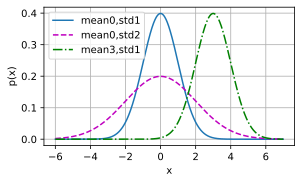

In [41]:
x=np.arange(-6,7,0.01)

params=[(0,1),(0,2),(3,1)]
d2l.plot(x,[normal(x,mu,sigma)for mu,sigma in params],
         xlabel='x', ylabel='p(x)',figsize=(4.5,2.5),
         legend=[f'mean{mu},std{sigma}'for mu,sigma in params])

In [42]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [45]:
def synthetic_data(w,b,num_examples):
    X=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels = synthetic_data(true_w,true_b,1000)

In [48]:
for i in range(5):
    print('features:', features[i],'\nlabel:', labels[i])

features: tensor([0.3637, 0.1855]) 
label: tensor([4.2971])
features: tensor([-0.5391, -0.1094]) 
label: tensor([3.4812])
features: tensor([ 1.4438, -0.2024]) 
label: tensor([7.7857])
features: tensor([2.3042, 0.3148]) 
label: tensor([7.7520])
features: tensor([ 0.0428, -0.1145]) 
label: tensor([4.6704])


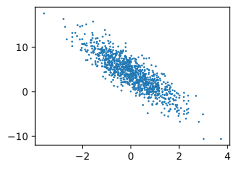

In [49]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);

In [58]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

In [106]:
batch_size=10

for X,y in data_iter(batch_size,features, labels):
    print(X,'\n',y)

tensor([[ 0.0287,  2.3761],
        [-0.8475,  0.1766],
        [-0.3761, -1.5543],
        [-2.6316, -0.3890],
        [ 1.2476,  1.2166],
        [ 0.8614,  1.4254],
        [-0.2540, -0.5444],
        [ 0.0818,  1.3039],
        [-0.4980,  0.0689],
        [-1.3389, -0.7304]]) 
 tensor([[-3.8136],
        [ 1.9019],
        [ 8.7324],
        [ 0.2619],
        [ 2.5518],
        [ 1.0832],
        [ 5.5678],
        [-0.0874],
        [ 2.9793],
        [ 4.0086]])
tensor([[-0.1551,  0.5854],
        [ 0.8155,  0.0302],
        [ 0.1626, -1.4895],
        [ 0.5530,  1.4305],
        [ 0.4767,  0.3998],
        [ 0.2187,  1.1289],
        [ 0.2652, -0.8387],
        [-0.8018, -0.9890],
        [-0.4961,  0.2487],
        [-1.1502, -0.9708]]) 
 tensor([[1.9063],
        [5.7469],
        [9.5888],
        [0.4434],
        [3.8039],
        [0.7979],
        [7.5979],
        [5.9510],
        [2.3826],
        [5.2130]])
tensor([[ 8.1056e-01, -3.2691e-01],
        [ 1.1830e+00, -1.0

In [103]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)
#w=torch.normal(0,0,size=(2,1),requires_grad=True)
#b=torch.zeros(1,requires_grad=True)


In [94]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [95]:
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [96]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()

In [104]:
lr=0.03
num_epochs=3
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
        for X,y in data_iter(batch_size,features,labels):
            l=loss(net(X,w,b),y)
            #计算loss
            
            l.sum().backward()
            #loss反向传播
            sgd([w,b],lr,batch_size)
            #更新参数
        with torch.no_grad():
            train_l = loss(net(features,w,b),labels)
            print(f'epoch{epoch+1},loss{float(train_l.mean()):f}')

epoch1,loss0.043321
epoch2,loss0.000173
epoch3,loss0.000050


In [105]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0002, -0.0011], grad_fn=<SubBackward0>)
b的估计误差: tensor([5.3406e-05], grad_fn=<RsubBackward1>)


In [92]:
torch.normal(2, 0, size=(1, 4))

tensor([[2., 2., 2., 2.]])

In [120]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = d2l.synthetic_data(true_w,true_b,1000)

def load_array(data_arrays,batch_size,is_train=True):
    dataset=data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

batch_size=30
data_iter=load_array((features,labels),batch_size)

In [121]:
# nn是神经网络的缩写
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

In [122]:
net[0].weight.data.normal_(0,0.01)#权重
net[0].bias.data.fill_(0)#预测参数

tensor([0.])

In [123]:
net[0]

Linear(in_features=2, out_features=1, bias=True)

In [124]:
loss=nn.MSELoss()

In [125]:
trainer=torch.optim.SGD(net.parameters(),lr=0.03)

In [128]:
num_epochs=9
for epoch in range(num_epochs):
    for X,y in data_iter:
        l=loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l=loss(net(features),labels)
    print(f'epoch{epoch+1},loss{l:f}')

epoch1,loss0.000104
epoch2,loss0.000102
epoch3,loss0.000103
epoch4,loss0.000103
epoch5,loss0.000102
epoch6,loss0.000103
epoch7,loss0.000103
epoch8,loss0.000102
epoch9,loss0.000102


In [129]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([-0.0008,  0.0004])
b的估计误差： tensor([0.0004])
